In [1]:
%matplotlib inline
from fastai import *
from fastai.vision import *

In [2]:
sz = 128

path = Path('data')
path_img = path/f'train-{sz}'

In [3]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('data/train-128/flying_saucer_100984.png'),
 PosixPath('data/train-128/star_83993.png'),
 PosixPath('data/train-128/bucket_81370.png'),
 PosixPath('data/train-128/dog_129470.png'),
 PosixPath('data/train-128/bucket_81253.png')]

In [4]:
pat = r'/([^/]+)_\d+.png$'

In [5]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=64, test=Path('../test-128'))
data.normalize(imagenet_stats)

In [6]:
#data.show_batch(rows=3, figsize=(7,6))

In [7]:
#print(data.classes)
#len(data.classes),data.c

## Training: resnet50

In [8]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

In [11]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate
1,1.207450,0.891527,0.255796
2,1.204719,0.896808,0.256240
3,1.150640,0.848999,0.244000


KeyboardInterrupt: 

First submission: 70% accuracy
Second submission: 80% accuracy 
All gone bad, time to start again.
Third submission: Resnet18, 1% of data(496914,2Gb), 128x128. 
                      First cycle: 0.309456(4,51mins) Second cycle: 0.258169(2,25mins)
                  Resnet34, 1% of data(496914,2Gb), 128x128.
                      First cycle: 0.277287(5,14minEa) Second cycle: 0.237570(2,17minEa)
                  Resnet50, 1% of data(496914,2Gb), 128x128.
                      First cycle: 0.247480(5,22minEa) Second cycle: 0.220309(2,30minEa)
                  Resnet50, 1% of data(496914,2Gb), 256x256
                      First cycle: 0.239810(5,1:26minEa) Second cycle: 0.217581(2,1:56minEa)
                  Resnet50, 2% of data(993989,4Gb), 128x128
                      First cycle: 0.227649(5,44minEa) Second cycle: 0.199576(2,58minEa)
                  Resnet50, 2% of data(993989,4Gb), 128x128
                      First cycle: 0.227649(5,44minEa) Second cycle: 0.192949(3,58minEa)
                  Resnet50, 5% of data(2485225,10Gb), 128x128
                      First cycle: 0.212874(5,1:51Ea) Second cycle: 0.178087(3,2:25Ea)
Fourth submission: Resnet50, 50% of data(,Gb), 128x128
                      First cycle: 

In [ ]:
learn.save('stage-1')

## Results

In [ ]:
#interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
#interp.plot_top_losses(9, figsize=(15,11))

## Unfreezing, fine-tuning, and learning rates

In [ ]:
learn.load('stage-1')

In [ ]:
learn.unfreeze()

In [ ]:
#learn.lr_find()

In [ ]:
#learn.recorder.plot()
#learn.recorder.plot_losses()

In [ ]:
learn.fit_one_cycle(3, max_lr=slice(5e-6,5e-4))

In [ ]:
learn.save('stage-2')

## Generate submission

In [10]:
learn.load('stage-2')

In [9]:
preds = learn.TTA(is_test=True)[0]
#preds = learn.TTA()[0]

Total time: 25:36



In [10]:
top_3 = np.argsort(preds.numpy())[:, ::-1][:, :3]

In [11]:
n, _ = top_3.shape
labels = []
for i in range(n):
    labels.append(' '.join([learn.data.train_ds.ds.classes[idx] for idx in top_3[i]]))

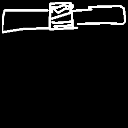

In [12]:
learn.data.test_dl.dl.dataset[0][0]

In [13]:
labels[0]

'belt square dishwasher'

In [14]:
key_ids = [path.stem for path in learn.data.test_dl.dl.dataset.x]

In [15]:
os.makedirs(f'subs', exist_ok=True)

In [16]:
sub = pd.DataFrame({'key_id': key_ids, 'word': labels})

In [17]:
sub.head()

,key_id,word
0,9083303642204918,belt square dishwasher
1,9299690584699015,microphone matches hammer
2,9318243600848667,paint_can drums bottlecap
3,9778177565835737,eraser cooler suitcase
4,9927431669040616,harp jail basket


In [18]:
name = 'fourth_sub'

In [19]:
sub.to_csv(f'subs/{name}.csv.gz', index=False, compression='gzip')

In [20]:
pd.read_csv(f'subs/{name}.csv.gz').head()

,key_id,word
0,9083303642204918,belt square dishwasher
1,9299690584699015,microphone matches hammer
2,9318243600848667,paint_can drums bottlecap
3,9778177565835737,eraser cooler suitcase
4,9927431669040616,harp jail basket


In [21]:
!kaggle competitions submit -c quickdraw-doodle-recognition -f subs/{name}.csv.gz -m "{name}"

100%|██████████████████████████████████████| 1.57M/1.57M [00:00<00:00, 1.83MB/s]
Successfully submitted to Quick, Draw! Doodle Recognition Challenge